In [75]:
import numpy as np

#Import for generating plots
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


### LR in Brief :

1. Training data contains features and labels which are real numbers (that will be packed into feature matrix X)
2. Model **y = Xw**

Here I am using synthetically generated data

In [76]:
w1 = 3
w0 = 4
n= 1000

X = 10 * np.random.rand(n,)
X
y = w1 * X + w0 + np.random.randn(n,)


In [77]:
print("Shape of the feature matrix:", X.shape)
print("Shape of the target matrix:", y.shape) #In this case both are vectors

Shape of the feature matrix: (1000,)
Shape of the target matrix: (1000,)


Let's divide the data into 2 parts, 80% for training and 20% for testing

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Split the data into training and testing sets


Let's check their shapes for sanity:

In [79]:
print("Shape of the training feature matrix:", X_train.shape)
print("Shape of the training target matrix:", y_train.shape)
print("Shape of the testing feature matrix:", X_test.shape)
print("Shape of the testing target matrix:", y_test.shape)

Shape of the training feature matrix: (800,)
Shape of the training target matrix: (800,)
Shape of the testing feature matrix: (200,)
Shape of the testing target matrix: (200,)


Let's visualize the Training set

c:\Users\dsudi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

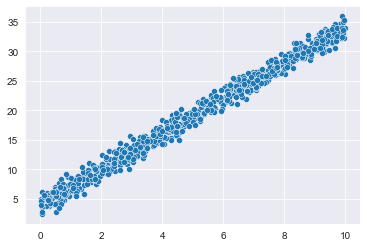

In [80]:
sns.set_style("darkgrid")
sns.scatterplot(X_train, y_train)

A dummy feature has to be added to incorporate the bias

In [81]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.column_stack((intercept, X))


In [82]:
print("before adding dummy variable:", X_train[:5])
X_train_with_dummy = add_intercept(X_train)
X_test_with_dummy = add_intercept(X_test)
#y_train_with_dummy = add_intercept(y_train)
#y_test_with_dummy = add_intercept(y_test)
print("after adding dummy variable:", X_train_with_dummy[:5])
print("after adding dummy variable:", X_test_with_dummy[:5])
#print("after adding dummy variable:", y_train_with_dummy[:5])
#print("after adding dummy variable:", y_test_with_dummy[:5])

before adding dummy variable: [6.56925902 2.61663148 8.01176716 6.17800119 2.68052358]
after adding dummy variable: [[1.         6.56925902]
 [1.         2.61663148]
 [1.         8.01176716]
 [1.         6.17800119]
 [1.         2.68052358]]
after adding dummy variable: [[1.         7.32655317]
 [1.         1.96524258]
 [1.         3.46158108]
 [1.         0.03390136]
 [1.         7.97663936]]


Now let's write the predict function

In [83]:
def predict(X, w):
    #first let's ccheck their compatibility
    assert X.shape[-1] == w.shape[0]
    return X.dot(w)

Since so far we have not trained our model , let's use a random weight vector to get prediction from our model

In [84]:
w= np.random.randn(2, )
y_hat = predict(X_train_with_dummy, w)
y_hat[:5]

array([7.00639496, 2.87001897, 8.51596195, 6.59694846, 2.93688127])

Loss function for Linear regression is : J(**w**) = 1/2(**Xw-y**)(**Xw-y**) 
let's implement the same using a function

In [85]:
def loss(X,y,w):
    e = y - predict(X,w)
    return (np.transpose(e) @ e) / 2
print(X_train_with_dummy.shape)
#print(y_train_with_dummy.shape)
print(w.shape)


(800, 2)
(2,)


In [86]:
# Current loss for our model which is not trained yet using randonm weights
print(loss(X_train_with_dummy, y_train, w))

print(loss(np.array([[1,2,2,1],[1,1,3,2]]), np.array([3,5]), 2*np.array([1,2,3,4])))

90767.65498448392
977.0


Optimization component
1. Normal equation method
2. Gradient descent method

    a. BGD
    b. MBGD
    c. SGD

In [87]:
#first lets define the normal equation function w = (X^T X)^-1 (X^T y)
def normal_equation(X, y):
    return np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ y
normal_equation(X_train_with_dummy, y_train)

array([4.03650102, 3.0022408 ])

In [88]:
#now let's define gradient descent function
#it will take in the feature matrix, target matrix, initial weights, learning rate, and number of iterations
#calculate the partial derivatives of the loss function with respect to each weight
#and return the updated weights

def calculate_gradient(X, y, w):
    return np.transpose(X) @ (predict(X, w) - y) # same as (X^T * (Xw - y))
def update_weights(w,grad,lr):
    return (w - lr * grad)


In [144]:
#Now we are ready to implement the gradient descent algorithm
def gradient_descent(X,y,learning_rate,epochs):
    w_all =[]
    err_all = []
    w= np.zeros(X.shape[1])
    ep = []
    for i in np.arange(0,epochs):
        w_all.append(w) #append the weights at each iteration for visualization
        ep.append(i)
        err_all.append(loss(X,y,w))
        grad = calculate_gradient(X,y,w)
        w = update_weights(w,grad,learning_rate)
        #if i%100 == 0:
            #print("Epoch:", i, "Loss:", loss(X,y,w)) #print the loss after each 100 iterations
    return w



In [145]:
gradient_descent(X_train_with_dummy, y_train, 0.00001, 2000)
#result is almost equal to our normal equation solution and the synthetic data is well fitted
#the loss is decreasing with each iteration


array([3.96588709, 3.01270114])

MBGD

In [146]:
#Same weight update function as before
#Same loss function as before
#Calculate the gradient with respect to each weight
#learning schedule function has to be defined which will decrease the learning rate with each iteration
t0,t1=200,100000
def learning_schedule(t):
    return t0/(t+t1)
#Now we are ready to implement the gradient descent algorithm
def minibatch_gradient_descent(X,y,itr,batch_size):
    w_all =[]
    err_all = []
    w= np.zeros(X.shape[1])
    ep = []
    t= 0
    for epoch in range(itr):
        shuffled_indices = np.random.permutation(X.shape[0])
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in np.arange(0,X.shape[0],batch_size):
            t= t+1
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            err_all.append(loss(xi,yi,w))
            grad =2/batch_size* calculate_gradient(xi,yi,w)
            lr = learning_schedule(t)
            ep.append(i)
            w = update_weights(w,grad,lr)
            w_all.append(w)
            #print("Epoch:", epoch, "Loss:", loss(xi,yi,w)) 
    return w
    

In [147]:
print(gradient_descent(X_train_with_dummy, y_train,0.00001, 2500))
print(minibatch_gradient_descent(X_train_with_dummy, y_train, 200,8))

[4.00991565 3.00617901]
[4.03694545 3.0071136 ]


SGD

In [148]:
def SGD(X,y,itr):
    w_all =[]
    err_all = []
    w= np.zeros(X.shape[1])
    ep = []
    t= 0
    for epoch in range(itr):
        for i in np.arange(X.shape[0]):
            random_index = np.random.randint(X.shape[0])
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            err_all.append(loss(xi,yi,w))
            grad =2* calculate_gradient(xi,yi,w)
            lr = learning_schedule(t)
            ep.append(i)
            w = update_weights(w,grad,lr)
            w_all.append(w)
            #print("Epoch:", epoch, "Loss:", loss(xi,yi,w)) 
    return w

In [150]:
SGD(X_train_with_dummy, y_train, 20)

array([4.05987155, 3.04342338])